In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Dive in and explore the data set. Look for something that provokes a question that can be answered with an experiment.

df = pd.read_csv('./data/mc-2016.csv')
df.head(1)

,company_id,guid,subject,from,reply_to,mobile_optimized,sent_at,animated,body_bytes,image_bytes
0,578.0,8564454b-f39e-c1bf-45b1-5166bf8bdb10,My M&M's & More,"[{""address"":""noreply@r.groupon.com"",""name"":""Gr...",NaN,t,2016-06-12 20:17:25,f,53936,175079


In [3]:
# add a month column
df['month'] = df['sent_at'].apply(lambda x: str(x).split(' ')[0].split('-')[1])
df.head(1)

,company_id,guid,subject,from,reply_to,mobile_optimized,sent_at,animated,body_bytes,image_bytes,month
0,578.0,8564454b-f39e-c1bf-45b1-5166bf8bdb10,My M&M's & More,"[{""address"":""noreply@r.groupon.com"",""name"":""Gr...",NaN,t,2016-06-12 20:17:25,f,53936,175079,06


In [4]:
# drop anything that's not from 2016
df = df[df['sent_at'].str.contains('2016')]

In [32]:
# gather monthly email volume
email_volume_by_month = df.groupby(['month']).size()

In [35]:
# understand mobile optimization trends
mobile = df[df['mobile_optimized'] == 't'].groupby(['month']).size()
mobile_rate = mobile / email_volume_by_month

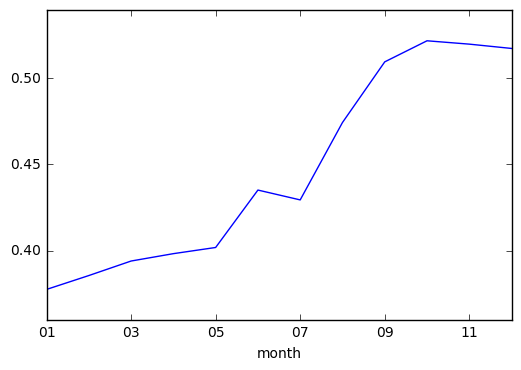

In [36]:
mobile_rate.plot()

In [39]:
# Experimentation RFC: propose and outline an experiment plan


**Part 1: Analysis that highlights your experimental hypothesis.**
> The problem: define the question or problem, justify why the problem should be studied, and review what we already know about the problem.

Our emails are not mobile optimized. As seen from the above research, the email industry is quickly adopting mobile optimized email templates. Given that 45% of our sales comes from mobile (made up number) and that 20% of purchases come from email (made up number), a mobile optimized email template may help us drive additional sales.

**Part 2: A rollout plan showing how you would implement and rollout the experiment.**
> The potential solution: propose a hypothesis (potential explanation) to be tested

We will create a mobile optimized email template using the same style as our existing, non-mobile, email. This ensures the only difference is whether the email template is mobile optimized or not.

The mobile email version will go into production the first week of May and will be sent to 10% of randomly selected subscribers. We can do this directly from within our ESP (email service provider).

**Part 3: An evaluation plan showing what constitutes success in this experiment.**
> The method of testing the solution: describe the design of the experiment, the analysis plan, and set benchmarks

As mentioned earlier, the test will be first rolled out to 10% of our subscribers. If this email performs as well, or better than, the non-mobile optimized template we will do a follow up test next week as a 50/50 split.

The metrics to monitor are:

- Open rate
- Click rate
- Gross sales volume

Our existing, non-mobile optimized email template has seen the following mean performance over the last 4 weeks:

- Open rate: 32%
- Click rate: 5.5%
- Gross sales volume: $18,143
